# Working notes + pseudo

Project presentation is 3 Nov, Report of 8 pages will be due 2 weeks later.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Preparation Imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA


# Graphing Imports
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

!pip install xgboost==1.5.0
import xgboost as xgb

# Training Imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Test Imports
from sklearn.metrics import roc_curve, roc_auc_score # ROC Imports
from sklearn.metrics import precision_recall_curve, average_precision_score # PRC Imports, average_precision_score == roc_auc_score -> https://sinyi-chou.github.io/python-sklearn-precision-recall/

     |████████████████████████████████| 173.5 MB 71 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
data = pd.read_csv('online_shoppers_intention.csv', sep = ',')
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# 1. Data Cleaning

In [ ]:
data["VisitorType"].unique()

NameError: name 'data' is not defined

In [ ]:
# No null values to deal with
sum(data.isnull().any())

0

In [ ]:
data.shape # 12330 rows, 18 cols

(12330, 18)

In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

## 1.1. Transformation and Standardization

In [ ]:
NUMERICAL_COLS = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
NUMERICAL_COLS

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [ ]:
# Original Distributions
fig = make_subplots(rows = len(NUMERICAL_COLS)//2, cols = 2, subplot_titles = NUMERICAL_COLS)

for col_index in range(len(NUMERICAL_COLS)):
    fig.add_trace(
        go.Histogram(x = data[NUMERICAL_COLS[col_index]]),
        row = col_index // 2 + 1, col = col_index % 2 + 1
    )

fig.update_layout(height = 1000, showlegend = False, title_text="Numerical Cols")
fig.show()

In [ ]:
data_transformed = data.copy()

for c in NUMERICAL_COLS:
    data_transformed[c] = np.log(data_transformed[c]+1)

fig = make_subplots(rows = len(NUMERICAL_COLS)//2, cols = 2, subplot_titles = NUMERICAL_COLS)

for col_index in range(len(NUMERICAL_COLS)):
    fig.add_trace(
        go.Histogram(x = data_transformed[NUMERICAL_COLS[col_index]]),
        row = col_index // 2 + 1, col = col_index % 2 + 1
    )

fig.update_layout(height = 1000, showlegend = False, title_text="Numerical Cols")
fig.show()

In [ ]:
# Scaling Numerical Data
scaler = MinMaxScaler()
scaled_NUMERICAL_COLS = pd.DataFrame(scaler.fit_transform(data_transformed[NUMERICAL_COLS]), columns = NUMERICAL_COLS)
scaled_NUMERICAL_COLS.tail()

Administrative  Administrative_Duration  Informational  \
12325        0.416029                  0.61288            0.0   
12326        0.000000                  0.00000            0.0   
12327        0.000000                  0.00000            0.0   
12328        0.482995                  0.53259            0.0   
12329        0.000000                  0.00000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12325                     0.0        0.608113                 0.676567   
12326                     0.0        0.273150                 0.555364   
12327                     0.0        0.296650                 0.471859   
12328                     0.0        0.422676                 0.528574   
12329                     0.0        0.211338                 0.280343   

       BounceRates  ExitRates  PageValues  SpecialDay  
12325     0.039038   0.156960    0.438324         0.0  
12326     0.000000   0.115779    0.000000         0.0  
12327     0.439019   0.455870    0.000000         0.0  
12328     0.000000   0.114271    0.000000         0.0  
12329     0.000000   0.353982    0.000000         0.0

In [ ]:
# Scaled Distributions
fig = make_subplots(rows = len(NUMERICAL_COLS)//2, cols = 2, subplot_titles = NUMERICAL_COLS)

for col_index in range(len(NUMERICAL_COLS)):
    fig.add_trace(
        go.Histogram(x = scaled_NUMERICAL_COLS[NUMERICAL_COLS[col_index]]),
        row = col_index // 2 + 1, col = col_index % 2 + 1
    )

fig.update_layout(height = 1000, showlegend = False, title_text="Numerical Cols")
fig.show()

## 1.2. One-Hot Encoding

In [ ]:
# True/False Columns OH Encoding
data_transformed['Weekend'] = data_transformed['Weekend'].map({False : 0, True : 1})
data_transformed['Revenue'] = data_transformed['Revenue'].map({False : 0, True : 1})

In [ ]:
CATEGORICAL_COLS = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
dummy_cols = {}

for col in CATEGORICAL_COLS:
    dummy_cols[col] = pd.get_dummies(data_transformed[col], prefix = f"{col}=")
    data_transformed = pd.concat([data_transformed, pd.get_dummies(data_transformed[col], prefix = f"{col}=")], axis = 1).drop(col, axis = 1)

data_transformed.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0        0.693147                 0.000000   
1                     0.0        1.098612                 4.174387   
2                     0.0        0.693147                 0.000000   
3                     0.0        1.098612                 1.299283   
4                     0.0        2.397895                 6.443336   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType=_14  \
0     0.182322   0.182322         0.0         0.0  ...                0   
1     0.000000   0.095310         0.0         0.0  ...                0   
2     0.182322   0.182322         0.0         0.0  ...                0   
3     0.048790   0.131028         0.0         0.0  ...                0   
4     0.019803   0.048790         0.0         0.0  ...                0   

   TrafficType=_15  TrafficType=_16  TrafficType=_17  TrafficType=_18  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   TrafficType=_19  TrafficType=_20  VisitorType=_New_Visitor  \
0                0                0                         0   
1                0                0                         0   
2                0                0                         0   
3                0                0                         0   
4                0                0                         0   

   VisitorType=_Other  VisitorType=_Returning_Visitor  
0                   0                               1  
1                   0                               1  
2                   0                               1  
3                   0                               1  
4                   0                               1  

[5 rows x 75 columns]

## 1.3. Cleaned Data

In [ ]:
# Combine OH Encoded and MinMax Scaled
data_transformed.drop(columns = NUMERICAL_COLS, inplace = True)
data_transformed = pd.concat([data_transformed, scaled_NUMERICAL_COLS], axis = 1)
data_transformed.head()

Weekend  Revenue  Month=_Aug  Month=_Dec  Month=_Feb  Month=_Jul  \
0        0        0           0           0           1           0   
1        0        0           0           0           1           0   
2        0        0           0           0           1           0   
3        0        0           0           0           1           0   
4        1        0           0           0           1           0   

   Month=_June  Month=_Mar  Month=_May  Month=_Nov  ...  Administrative  \
0            0           0           0           0  ...             0.0   
1            0           0           0           0  ...             0.0   
2            0           0           0           0  ...             0.0   
3            0           0           0           0  ...             0.0   
4            0           0           0           0  ...             0.0   

   Administrative_Duration  Informational  Informational_Duration  \
0                      0.0            0.0                     0.0   
1                      0.0            0.0                     0.0   
2                      0.0            0.0                     0.0   
3                      0.0            0.0                     0.0   
4                      0.0            0.0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0        0.105669                 0.000000     1.000000   1.000000   
1        0.167481                 0.377218     0.000000   0.522759   
2        0.105669                 0.000000     1.000000   1.000000   
3        0.167481                 0.117410     0.267605   0.718666   
4        0.365554                 0.582252     0.108614   0.267605   

   PageValues  SpecialDay  
0         0.0         0.0  
1         0.0         0.0  
2         0.0         0.0  
3         0.0         0.0  
4         0.0         0.0  

[5 rows x 75 columns]

In [ ]:
data.skew() # Skewness of th

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [ ]:
data_transformed.skew() # Check if data is transformed and scaled

Weekend                    1.265962
Revenue                    1.909509
Month=_Aug                 5.051570
Month=_Dec                 2.074482
Month=_Feb                 8.002600
                             ...   
ProductRelated_Duration   -1.421052
BounceRates                2.877552
ExitRates                  2.055103
PageValues                 1.805933
SpecialDay                 3.121345
Length: 75, dtype: float64

In [ ]:
# Replace the original data with the transformed and scaled data
data = data_transformed.copy()

# 2. EDA

In [ ]:
data.shape

(12330, 75)

In [ ]:
data.head()

Weekend  Revenue  Month=_Aug  Month=_Dec  Month=_Feb  Month=_Jul  \
0        0        0           0           0           1           0   
1        0        0           0           0           1           0   
2        0        0           0           0           1           0   
3        0        0           0           0           1           0   
4        1        0           0           0           1           0   

   Month=_June  Month=_Mar  Month=_May  Month=_Nov  ...  Administrative  \
0            0           0           0           0  ...             0.0   
1            0           0           0           0  ...             0.0   
2            0           0           0           0  ...             0.0   
3            0           0           0           0  ...             0.0   
4            0           0           0           0  ...             0.0   

   Administrative_Duration  Informational  Informational_Duration  \
0                      0.0            0.0                     0.0   
1                      0.0            0.0                     0.0   
2                      0.0            0.0                     0.0   
3                      0.0            0.0                     0.0   
4                      0.0            0.0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0        0.105669                 0.000000     1.000000   1.000000   
1        0.167481                 0.377218     0.000000   0.522759   
2        0.105669                 0.000000     1.000000   1.000000   
3        0.167481                 0.117410     0.267605   0.718666   
4        0.365554                 0.582252     0.108614   0.267605   

   PageValues  SpecialDay  
0         0.0         0.0  
1         0.0         0.0  
2         0.0         0.0  
3         0.0         0.0  
4         0.0         0.0  

[5 rows x 75 columns]

In [ ]:
data.describe()

Weekend       Revenue    Month=_Aug    Month=_Dec    Month=_Feb  \
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.232603      0.154745      0.035118      0.140065      0.014923   
std        0.422509      0.361676      0.184084      0.347068      0.121250   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Month=_Jul   Month=_June    Month=_Mar    Month=_May    Month=_Nov  \
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.035036      0.023358      0.154663      0.272830      0.243147   
std        0.183880      0.151043      0.361598      0.445432      0.429000   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  Administrative  Administrative_Duration  Informational  \
count  ...    12330.000000             12330.000000   12330.000000   
mean   ...        0.239170                 0.283671       0.073597   
std    ...        0.258943                 0.290836       0.153947   
min    ...        0.000000                 0.000000       0.000000   
25%    ...        0.000000                 0.000000       0.000000   
50%    ...        0.208015                 0.263184       0.000000   
75%    ...        0.482995                 0.559065       0.000000   
max    ...        1.000000                 1.000000       1.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                 0.107640        0.439893                 0.538804   
std                  0.231565        0.171340                 0.184624   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        0.317007                 0.471804   
50%                  0.000000        0.448874                 0.578049   
75%                  0.000000        0.558503                 0.658735   
max                  1.000000        1.000000                 1.000000   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.114724      0.225704      0.105896      0.067509  
std        0.243908      0.244004      0.215112      0.213593  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.077800      0.000000      0.000000  
50%        0.017045      0.136271      0.000000      0.000000  
75%        0.091447      0.267605      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 75 columns]

In [ ]:
# Class imbalance
data.groupby("Revenue").size()

Revenue
0    10422
1     1908
dtype: int64

In [ ]:
# Correlation Matrix to determine initial relationships between features/label
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plot = go.Figure(
    go.Heatmap(
        z = corr.mask(mask),
        x=corr.columns,
        y=corr.columns,
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1
    )
)

plot.update_layout(
    title_text='Correlation Heatmap between Initial Features (No Pre-processing)', 
    width=1000, 
    height=1000,
    xaxis_tickangle=90,
    yaxis_autorange='reversed',
    template='plotly_white'
)

plot.show()

# 4. Baseline Performance

## Train Test Splits

- Training Dataset: The sample of data used to fit the model.
- Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
- Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

TLDR; we portion out the test data to allow an unbiased comparison later on between models and model is train and validated with the data from the train set wholely to prevent data leakage.

In [ ]:
# Split labels from features
y = data["Revenue"]
X = data.copy().drop(columns = "Revenue")

# Stratified Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, shuffle = True, random_state = 421)

In [ ]:
# Stratified KFold Splits for Training and Validation
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 421)
skf.get_n_splits(X_train, y_train)

5

In [ ]:
# Model Result Store
MODEL_TEST_PROBA = {}
MODEL_BASE_PERFORMANCE = {}

## 4.1 Logistic Regression

In [ ]:
FOLD = 0
train_accuracies = []
test_accuracies = []

for train_index, test_index in skf.split(X_train, y_train):
    model = LogisticRegression(max_iter = 10000) # LR fails to converge on smaller iterations, number of features possibly too large for LR innately
    model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    train_accuracies.append(model.score(X_train.iloc[train_index], y_train.iloc[train_index]))
    test_accuracies.append(model.score(X_train.iloc[test_index], y_train.iloc[test_index]))
    

    print(f"============ [FOLD: {FOLD}] ============")
    print("Model Train Accuracy: ", train_accuracies[FOLD])
    print("Model Test Accuracy: ", test_accuracies[FOLD])  

    FOLD += 1

print(f"============ [Average KFold Accuracy] ============")
print("Model Train Accuracy: ", sum(train_accuracies)/(FOLD))
print("Model Test Accuracy: ", sum(test_accuracies)/(FOLD))  

============ [FOLD: 0] ============
Model Train Accuracy:  0.8969712330503105
Model Test Accuracy:  0.8920425747592499
============ [FOLD: 1] ============
Model Train Accuracy:  0.8979850462552275
Model Test Accuracy:  0.8900152052711606
============ [FOLD: 2] ============
Model Train Accuracy:  0.8948168799898618
Model Test Accuracy:  0.8991383679675621
============ [FOLD: 3] ============
Model Train Accuracy:  0.8943099733874034
Model Test Accuracy:  0.9011657374556513
============ [FOLD: 4] ============
Model Train Accuracy:  0.8971109984794728
Model Test Accuracy:  0.8935091277890467
============ [Average KFold Accuracy] ============
Model Train Accuracy:  0.8962388262324552
Model Test Accuracy:  0.8951742026485341


In [ ]:
# Logistic Regression Test
model_lr = LogisticRegression(max_iter = 10000)
model_lr.fit(X_train, y_train)
MODEL_TEST_PROBA["Logistic Regression"] = model_lr.predict_proba(X_test)[ : ,1]
model_lr.score(X_test, y_test) 

0.9002433090024331

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

True Negatives:  2002
False Positives:  82
False Negatives:  164
True Positives:  218
Accuracy {:0.2f} 90.02433090024331
Precision 0.73
Recall 0.57
F1 Score 0.64


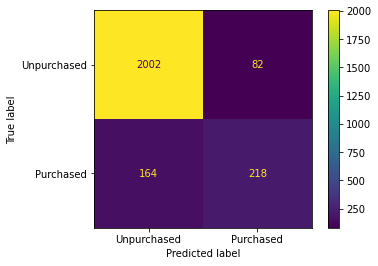

In [ ]:
y_pred = model_lr.predict(X_test)
plot_confusion_matrix(model_lr,X_test,y_test,values_format='d',display_labels=['Unpurchased','Purchased'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
Precision = tp/(tp+fp) 
Recall = tp/(tp+fn) 
f1 = (2*Precision*Recall)/(Precision + Recall)
print("Accuracy {:0.2f}", format(Accuracy))
print("Precision {:0.2f}".format(Precision))
print("Recall {:0.2f}".format(Recall))
print("F1 Score {:0.2f}".format(f1))
MODEL_BASE_PERFORMANCE['Logistic Regression'] = {'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'F1': f1}

## 4.2 K-nearest neighbours

In [ ]:
FOLD = 0
train_accuracies = []
test_accuracies = []

for train_index, test_index in skf.split(X_train, y_train):
    model = KNeighborsClassifier() # Un-tuned
    model.fit(X_train.iloc[train_index].values, y_train.iloc[train_index]) # KNN requires .values on df data from SKlearn 1.0 (else will throw warning)
    train_accuracies.append(model.score(X_train.iloc[train_index].values, y_train.iloc[train_index]))
    test_accuracies.append(model.score(X_train.iloc[test_index].values, y_train.iloc[test_index]))

    print(f"============ [FOLD: {FOLD}] ============")
    print("Model Train Accuracy: ", train_accuracies[FOLD])
    print("Model Test Accuracy: ", test_accuracies[FOLD])  

    FOLD += 1

print(f"============ [Average KFold Accuracy] ============")
print("Model Train Accuracy: ", sum(train_accuracies)/(FOLD))
print("Model Test Accuracy: ", sum(test_accuracies)/(FOLD))  

============ [FOLD: 0] ============
Model Train Accuracy:  0.8837916613863895
Model Test Accuracy:  0.8530157121135327
============ [FOLD: 1] ============
Model Train Accuracy:  0.8891141807122038
Model Test Accuracy:  0.8494678155093766
============ [FOLD: 2] ============
Model Train Accuracy:  0.8889874540615892
Model Test Accuracy:  0.8443993917891536
============ [FOLD: 3] ============
Model Train Accuracy:  0.8845520212900773
Model Test Accuracy:  0.8545362392295996
============ [FOLD: 4] ============
Model Train Accuracy:  0.8884946781550938
Model Test Accuracy:  0.8498985801217038
============ [Average KFold Accuracy] ============
Model Train Accuracy:  0.8869879991210707
Model Test Accuracy:  0.8502635477526732


In [ ]:
# KNN Test
model_knn = KNeighborsClassifier()
model_knn.fit(X_train.values, y_train)
MODEL_TEST_PROBA["KNeighborsClassifier"] = model_knn.predict_proba(X_test.values)[ : ,1]
model_knn.score(X_test.values, y_test)

0.8592862935928629

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

True Negatives:  2024
False Positives:  60
False Negatives:  287
True Positives:  95
Accuracy {:0.2f} 85.92862935928629
Precision 0.61
Recall 0.25
F1 Score 0.35


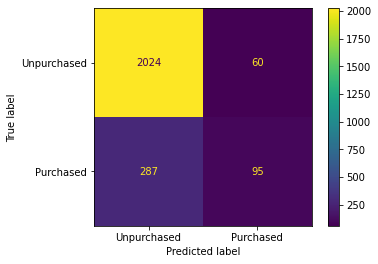

In [ ]:
y_pred = model_knn.predict(X_test)
plot_confusion_matrix(model_knn,X_test,y_test,values_format='d',display_labels=['Unpurchased','Purchased'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
Precision = tp/(tp+fp) 
Recall = tp/(tp+fn) 
f1 = (2*Precision*Recall)/(Precision + Recall)
print("Accuracy {:0.2f}", format(Accuracy))
print("Precision {:0.2f}".format(Precision))
print("Recall {:0.2f}".format(Recall))
print("F1 Score {:0.2f}".format(f1))
MODEL_BASE_PERFORMANCE['KNeighborsClassifier'] = {'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'F1': f1}

## 4.3 Decision Trees

In [ ]:
FOLD = 0
train_accuracies = []
test_accuracies = []

for train_index, test_index in skf.split(X_train, y_train):
    model = DecisionTreeClassifier(random_state = 421) # Unoptimised
    model.fit(X_train.iloc[train_index], y_train.iloc[train_index]) 
    train_accuracies.append(model.score(X_train.iloc[train_index], y_train.iloc[train_index]))
    test_accuracies.append(model.score(X_train.iloc[test_index], y_train.iloc[test_index]))

    print(f"============ [FOLD: {FOLD}] ============")
    print("Model Train Accuracy: ", train_accuracies[FOLD])
    print("Model Test Accuracy: ", test_accuracies[FOLD])  

    FOLD += 1

print(f"============ [Average KFold Accuracy] ============")
print("Model Train Accuracy: ", sum(train_accuracies)/(FOLD))
print("Model Test Accuracy: ", sum(test_accuracies)/(FOLD))  

============ [FOLD: 0] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.858590978205778
============ [FOLD: 1] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.852002027369488
============ [FOLD: 2] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8565636087176888
============ [FOLD: 3] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8707551951343132
============ [FOLD: 4] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8493914807302231
============ [Average KFold Accuracy] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8574606580314983


In [ ]:
# Decision Tree Test
model_dtree = DecisionTreeClassifier(random_state = 421)
model_dtree.fit(X_train.values, y_train)
MODEL_TEST_PROBA["DecisionTreeClassifier"] = model_dtree.predict_proba(X_test.values)[ : ,1]
model_dtree.score(X_test.values, y_test)

0.864963503649635

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

True Negatives:  1910
False Positives:  174
False Negatives:  159
True Positives:  223
Accuracy {:0.2f} 86.4963503649635
Precision 0.56
Recall 0.58
F1 Score 0.57


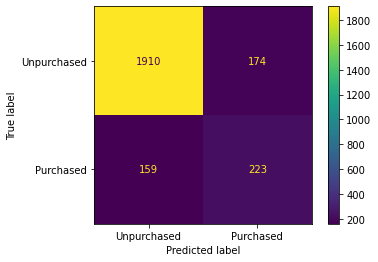

In [ ]:
y_pred = model_dtree.predict(X_test)
plot_confusion_matrix(model_dtree,X_test,y_test,values_format='d',display_labels=['Unpurchased','Purchased'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
Precision = tp/(tp+fp) 
Recall = tp/(tp+fn) 
f1 = (2*Precision*Recall)/(Precision + Recall)
print("Accuracy {:0.2f}", format(Accuracy))
print("Precision {:0.2f}".format(Precision))
print("Recall {:0.2f}".format(Recall))
print("F1 Score {:0.2f}".format(f1))
MODEL_BASE_PERFORMANCE['DecisionTreeClassifier'] = {'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'F1': f1}

## 4.4 Random Forest (Ensemble Model)

In [ ]:
FOLD = 0
train_accuracies = []
test_accuracies = []


for train_index, test_index in skf.split(X_train, y_train):
    model_rf_skf = RandomForestClassifier(random_state = 421) # Unoptimised
    model_rf_skf.fit(X_train.iloc[train_index], y_train.iloc[train_index]) 
    train_accuracies.append(model_rf_skf.score(X_train.iloc[train_index], y_train.iloc[train_index]))
    test_accuracies.append(model_rf_skf.score(X_train.iloc[test_index], y_train.iloc[test_index]))

    print(f"============ [FOLD: {FOLD}] ============")
    print("Model Train Accuracy: ", train_accuracies[FOLD])
    print("Model Test Accuracy: ", test_accuracies[FOLD])  

    FOLD += 1

print(f"============ [Average KFold Accuracy] ============")
print("Model Train Accuracy: ", sum(train_accuracies)/(FOLD))
print("Model Test Accuracy: ", sum(test_accuracies)/(FOLD))  

============ [FOLD: 0] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8991383679675621
============ [FOLD: 1] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8991383679675621
============ [FOLD: 2] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8976178408514952
============ [FOLD: 3] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.9072478459199189
============ [FOLD: 4] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8960446247464503
============ [Average KFold Accuracy] ============
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8998374094905977


In [ ]:
# Random Forests Test
model_rf = RandomForestClassifier(random_state = 421)
model_rf.fit(X_train.values, y_train)
MODEL_TEST_PROBA["RandomForestClassifier"] = model_rf.predict_proba(X_test.values)[ : ,1]
model_rf.score(X_test.values, y_test)

0.9018653690186537

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

True Negatives:  2028
False Positives:  56
False Negatives:  185
True Positives:  197
Accuracy {:0.2f} 90.22708840227088
Precision 0.78
Recall 0.52
F1 Score 0.62


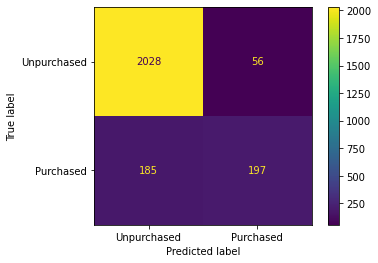

In [ ]:
y_pred = model_rf_skf.predict(X_test)
plot_confusion_matrix(model_rf_skf,X_test,y_test,values_format='d',display_labels=['Unpurchased','Purchased'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
Precision = tp/(tp+fp) 
Recall = tp/(tp+fn) 
f1 = (2*Precision*Recall)/(Precision + Recall)
print("Accuracy {:0.2f}", format(Accuracy))
print("Precision {:0.2f}".format(Precision))
print("Recall {:0.2f}".format(Recall))
print("F1 Score {:0.2f}".format(f1))
MODEL_BASE_PERFORMANCE['RandomForestClassifier'] = {'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'F1': f1}

In [ ]:
for key, value in MODEL_BASE_PERFORMANCE.items():
    print(f"{key}: {value}")
    
    # print("===",key,"===")
    # for k, v in value.items():
    #     print(f"{k}: {v}")
    # print('\n')


Logistic Regression: {'Accuracy': 90.02433090024331, 'Precision': 0.7266666666666667, 'Recall': 0.5706806282722513, 'F1': 0.6392961876832844}
KNeighborsClassifier: {'Accuracy': 85.92862935928629, 'Precision': 0.6129032258064516, 'Recall': 0.2486910994764398, 'F1': 0.35381750465549344}
DecisionTreeClassifier: {'Accuracy': 86.4963503649635, 'Precision': 0.5617128463476071, 'Recall': 0.5837696335078534, 'F1': 0.5725288831835686}
RandomForestClassifier: {'Accuracy': 90.22708840227088, 'Precision': 0.7786561264822134, 'Recall': 0.5157068062827225, 'F1': 0.6204724409448817}


## 4.5 XGBoost

In [ ]:
FOLD = 0
train_accuracies = []
test_accuracies = []

for train_index, test_index in skf.split(X_train, y_train):
    model = xgb.XGBClassifier(random_state = 421, objective='binary:logistic', use_label_encoder=False) # Unoptimised
    model.fit(X_train.iloc[train_index], y_train.iloc[train_index]) 
    train_accuracies.append(model.score(X_train.iloc[train_index], y_train.iloc[train_index]))
    test_accuracies.append(model.score(X_train.iloc[test_index], y_train.iloc[test_index]))

    print(f"============ [FOLD: {FOLD}] ============")
    print("Model Train Accuracy: ", train_accuracies[FOLD])
    print("Model Test Accuracy: ", test_accuracies[FOLD])  

    FOLD += 1

print(f"============ [Average KFold Accuracy] ============")
print("Model Train Accuracy: ", sum(train_accuracies)/(FOLD))
print("Model Test Accuracy: ", sum(test_accuracies)/(FOLD))  

[08:15:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
============ [FOLD: 0] ============
Model Train Accuracy:  0.9913825877582055
Model Test Accuracy:  0.8966041561074506
[08:16:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
============ [FOLD: 1] ============
Model Train Accuracy:  0.9897351413002154
Model Test Accuracy:  0.8920425747592499
[08:16:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
======

In [ ]:
from sklearn.metrics import accuracy_score

model_xgboost = xgb.XGBClassifier()
eval_set = [(X_test,y_test)]
model_xgboost.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, eval_metric='aucpr')
y_predict = model_xgboost.predict(X_test)
y_train_predict = model_xgboost.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train,y_train_predict))
print("Test Accuracy: ", accuracy_score(y_test,y_predict))

[0]	validation_0-aucpr:0.74104
/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[1]	validation_0-aucpr:0.74249
[2]	validation_0-aucpr:0.74023
[3]	validation_0-aucpr:0.74501
[4]	validation_0-aucpr:0.74860
[5]	validation_0-aucpr:0.75706
[6]	validation_0-aucpr:0.75767
[7]	validation_0-aucpr:0.75658
[8]	validation_0-aucpr:0.75547
[9]	validation_0-aucpr:0.75699
[10]	validation_0-aucpr:0.75909
[11]	validation_0-aucpr:0.75935
[12]	validation_0-aucpr:0.75889
[13]	validation_0-aucpr:0.75924
[14]	validation_0-aucpr:0.75898
[15]	validation_0-aucpr:0.76041
[16]	validation_0-aucpr:0.75913
[17]	validation_0-aucpr:0.75710
[18]	validation_0-aucpr:0.75526
[19]	valid

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



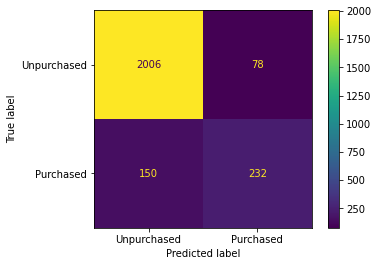

In [ ]:
plot_confusion_matrix(model_xgboost,X_test,y_test,values_format='d',display_labels=['Unpurchased','Purchased'])

## 4.6 Model Comparisons

### 4.6.1 ROC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 0, y1 = 1) # Random guess (for reference)

for model in MODEL_TEST_PROBA.keys():
    fpr, tpr, threshold = roc_curve(y_test, MODEL_TEST_PROBA[model])
    auc_score = roc_auc_score(y_test, MODEL_TEST_PROBA[model])

    fig.add_trace(go.Scatter(x = fpr, y = tpr, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "ROC AUC", xaxis_title = "False Positive Rate", yaxis_title = "True Positive Rate", height = 700, width = 900)
fig.show()

### 4.6.2 PRC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 1, y1 = 0) # Random guess (for reference)

for model in MODEL_TEST_PROBA.keys():
    precision, recall, threshold = precision_recall_curve(y_test, MODEL_TEST_PROBA[model])
    auc_score = average_precision_score(y_test, MODEL_TEST_PROBA[model])

    fig.add_trace(go.Scatter(x = recall, y = precision, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "PRC AUC", xaxis_title = "Recall", yaxis_title = "Precision", height = 700, width = 900)
fig.show()

# 5. Improvements

In [ ]:
# Consolidated predicted probas for graphs
PCA_MODEL_TEST_PROBA = {}

# Define cross validator
cv = StratifiedKFold(5, shuffle = True, random_state = 421)

## 5.1 "Curse of Dimensionality" - PCA

"As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially." -&nbsp;Charles Isbell, Professor and Senior Associate Dean, School of Interactive Computing, Georgia Tech (https://www.kdnuggets.com/2017/04/must-know-curse-dimensionality.html)

In [ ]:
# Label encoding instead of OH encoding
data.head()

Weekend  Revenue  Month=_Aug  Month=_Dec  Month=_Feb  Month=_Jul  \
0        0        0           0           0           1           0   
1        0        0           0           0           1           0   
2        0        0           0           0           1           0   
3        0        0           0           0           1           0   
4        1        0           0           0           1           0   

   Month=_June  Month=_Mar  Month=_May  Month=_Nov  ...  Administrative  \
0            0           0           0           0  ...             0.0   
1            0           0           0           0  ...             0.0   
2            0           0           0           0  ...             0.0   
3            0           0           0           0  ...             0.0   
4            0           0           0           0  ...             0.0   

   Administrative_Duration  Informational  Informational_Duration  \
0                      0.0            0.0                     0.0   
1                      0.0            0.0                     0.0   
2                      0.0            0.0                     0.0   
3                      0.0            0.0                     0.0   
4                      0.0            0.0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0        0.105669                 0.000000     1.000000   1.000000   
1        0.167481                 0.377218     0.000000   0.522759   
2        0.105669                 0.000000     1.000000   1.000000   
3        0.167481                 0.117410     0.267605   0.718666   
4        0.365554                 0.582252     0.108614   0.267605   

   PageValues  SpecialDay  
0         0.0         0.0  
1         0.0         0.0  
2         0.0         0.0  
3         0.0         0.0  
4         0.0         0.0  

[5 rows x 75 columns]

In [ ]:
pca = PCA(n_components = 20)
decomposed_data = data.copy().drop(columns = "Revenue")
pca.fit(decomposed_data)
decomposed_data = pca.transform(decomposed_data)

print(f"Explained variation/principal component: {pca.explained_variance_ratio_}")
print(f"Total explained variation: {sum(pca.explained_variance_ratio_)}")

Explained variation/principal component: [0.12017492 0.08445602 0.07122538 0.06512536 0.0592855  0.04985868
 0.04477198 0.04104826 0.03824332 0.03487654 0.03273113 0.0310599
 0.02543818 0.02173079 0.02063862 0.01979052 0.01675925 0.01567163
 0.01415901 0.01362427]
Total explained variation: 0.8206692653303235


In [ ]:
# Split labels from features
y = data["Revenue"]
X = data.copy().drop(columns = "Revenue")
X = pd.DataFrame(pca.transform(X.copy()), columns = [f"PC{i+1}" for i in range(1, 21)])

# Stratified Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, shuffle = True, random_state = 421)

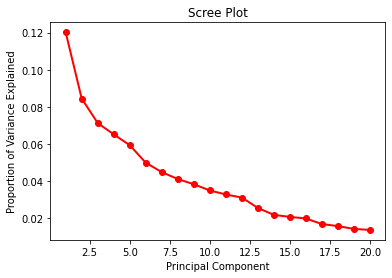

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

## 5.2 Logistic Regression

In [ ]:
# LR Test
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)
PCA_MODEL_TEST_PROBA["Logistic Regression"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.8499594484995945

## 5.3 K-nearest neighbours

In [ ]:
# KNN Test
model = KNeighborsClassifier()
model.fit(X_train.values, y_train)
PCA_MODEL_TEST_PROBA["KNeighborsClassifier"] = model.predict_proba(X_test.values)[ : ,1]
model.score(X_test.values, y_test)

0.8394160583941606

## 5.4 Decision Trees 

In [ ]:
# Decision Tree Test
model = DecisionTreeClassifier(random_state = 421)
model.fit(X_train, y_train)
PCA_MODEL_TEST_PROBA["DecisionTreeClassifier"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.7806163828061639

## 5.5 Random Forests

In [ ]:
# Decision Tree Test
model = RandomForestClassifier(random_state = 421)
model.fit(X_train, y_train)
PCA_MODEL_TEST_PROBA["RandomForestClassifier"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.8483373884833739

## 5.6 XGBoost

In [ ]:
# XGBoost Test

model = xgb.XGBClassifier(use_label_encoder=False,eval_metric='aucpr',random_state = 421)
model.fit(X_train,y_train)
PCA_MODEL_TEST_PROBA["XGBClassifier"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.8414436334144363

## 5.7 Model Comparisons

### 5.7.1 ROC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 0, y1 = 1) # Random guess (for reference)

for model in PCA_MODEL_TEST_PROBA.keys():
    fpr, tpr, threshold = roc_curve(y_test, PCA_MODEL_TEST_PROBA[model])
    auc_score = roc_auc_score(y_test, PCA_MODEL_TEST_PROBA[model])

    fig.add_trace(go.Scatter(x = fpr, y = tpr, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "ROC AUC - PCA", xaxis_title = "False Positive Rate", yaxis_title = "True Positive Rate", height = 700, width = 900)
fig.show()

### 5.7.2 PRC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 1, y1 = 0) # Random guess (for reference)

for model in PCA_MODEL_TEST_PROBA.keys():
    precision, recall, threshold = precision_recall_curve(y_test, PCA_MODEL_TEST_PROBA[model])
    auc_score = average_precision_score(y_test, PCA_MODEL_TEST_PROBA[model])

    fig.add_trace(go.Scatter(x = recall, y = precision, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "PRC AUC - PCA", xaxis_title = "Recall", yaxis_title = "Precision", height = 700, width = 900)
fig.show()

# --- PCA DATA RESET ---

In [ ]:
# Split labels from features
y = data["Revenue"]
X = data.copy().drop(columns = "Revenue")

# Stratified Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, shuffle = True, random_state = 421)

In [ ]:
X_train.describe()

Weekend   Month=_Aug   Month=_Dec   Month=_Feb   Month=_Jul  \
count  9864.000000  9864.000000  9864.000000  9864.000000  9864.000000   
mean      0.231955     0.036395     0.138585     0.014294     0.034672   
std       0.422102     0.187280     0.345530     0.118708     0.182956   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Month=_June   Month=_Mar   Month=_May   Month=_Nov   Month=_Oct  ...  \
count  9864.000000  9864.000000  9864.000000  9864.000000  9864.000000  ...   
mean      0.023824     0.155211     0.272506     0.243106     0.045012  ...   
std       0.152508     0.362124     0.445271     0.428980     0.207341  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     1.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       Administrative  Administrative_Duration  Informational  \
count     9864.000000              9864.000000    9864.000000   
mean         0.239411                 0.283275       0.074029   
std          0.260039                 0.291351       0.154171   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.208015                 0.255728       0.000000   
75%          0.482995                 0.559773       0.000000   
max          1.000000                 1.000000       1.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             9864.000000     9864.000000              9864.000000   
mean                 0.107975        0.440025                 0.538317   
std                  0.231612        0.171974                 0.186176   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        0.317007                 0.472588   
50%                  0.000000        0.448874                 0.577990   
75%                  0.000000        0.558503                 0.659304   
max                  1.000000        1.000000                 1.000000   

       BounceRates    ExitRates   PageValues   SpecialDay  
count  9864.000000  9864.000000  9864.000000  9864.000000  
mean      0.116589     0.227559     0.105814     0.067256  
std       0.246688     0.246291     0.214295     0.213172  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.077800     0.000000     0.000000  
50%       0.018059     0.137851     0.000000     0.000000  
75%       0.091309     0.267605     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000  

[8 rows x 74 columns]

# --- PCA DATA RESET ---

# 6. Dealing w/ Imbalances (Up-sampling)

Upsampling should be conducted after Train-Test Splits to prevent data leakage.
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [ ]:
# Upsampled prediction probabilities
UPSAMPLED_PROBA = {}

In [ ]:
# Takes in feature and label to upsample and returns back features and labels

def upsampler(feature_df, label_df):
    original_df = feature_df.copy()
    original_df["Revenue"] = label_df
    lower_class_df = original_df[original_df["Revenue"] == 1]
    higher_class_df = original_df[original_df["Revenue"] == 0]

    upsampled_lower_class_df = resample(lower_class_df, random_state = 421, n_samples = higher_class_df.shape[0], replace = True)
    balanced_df = pd.concat([upsampled_lower_class_df, higher_class_df], axis = 0)
    y = balanced_df["Revenue"]
    X = balanced_df.drop(columns = "Revenue")
    
    return X, y

## 6.1 Logistic Regression - Up-sampled

In [ ]:
# LR Test
model = LogisticRegression(max_iter = 10000)
model.fit(*upsampler(X_train, y_train))
UPSAMPLED_PROBA["Logistic Regression"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.870235198702352

## 6.2 K-nearest neighbours - Up-sampled

In [ ]:
# KNN Test
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5, weights = 'distance')
model.fit(*upsampler(X_train, y_train))
UPSAMPLED_PROBA["KNeighborsClassifier"] = model.predict_proba(X_test.values)[ : ,1]
model.score(X_test.values, y_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



0.781021897810219

## 6.3  Decision Trees - Up-sampled

In [ ]:
# Decision Tree Test
model = DecisionTreeClassifier(random_state = 421)
model.fit(*upsampler(X_train, y_train))
UPSAMPLED_PROBA["DecisionTreeClassifier"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.870235198702352

## 6.4 Random Forests - Up-sampled

In [ ]:
# Decision Tree Test
model = RandomForestClassifier(random_state = 421)
model.fit(*upsampler(X_train, y_train))
UPSAMPLED_PROBA["RandomForestClassifier"] = model.predict_proba(X_test.values)[ : ,1]
model.score(X_test, y_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0.9034874290348743

## 6.5 XGBoost - Up-sampled

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False,eval_metric='aucpr')
model.fit(*upsampler(X_train, y_train))
UPSAMPLED_PROBA["XGBClassifier"] = model.predict_proba(X_test.values)[ : ,1]
model.score(X_test, y_test)

0.883617193836172

## 6.6 Model Comparisons

### 6.6.1 ROC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 0, y1 = 1) # Random guess (for reference)

for model in UPSAMPLED_PROBA.keys():
    fpr, tpr, threshold = roc_curve(y_test, UPSAMPLED_PROBA[model])
    auc_score = roc_auc_score(y_test, UPSAMPLED_PROBA[model])

    fig.add_trace(go.Scatter(x = fpr, y = tpr, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "ROC AUC - Upsampled Tuned Models", xaxis_title = "False Positive Rate", yaxis_title = "True Positive Rate", height = 700, width = 900)
fig.show()

## 6.6.2 PRC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 1, y1 = 0) # Random guess (for reference)

for model in UPSAMPLED_PROBA.keys():
    precision, recall, threshold = precision_recall_curve(y_test, UPSAMPLED_PROBA[model])
    auc_score = average_precision_score(y_test, UPSAMPLED_PROBA[model])

    fig.add_trace(go.Scatter(x = recall, y = precision, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "PRC AUC - Upsampled Tuned Models", xaxis_title = "Recall", yaxis_title = "Precision", height = 700, width = 900)
fig.show()

# 7. Final Models (Tuning)

In [ ]:
FINAL_TEST_PROBA = {}

## 7.1 Logistics Regression

In [ ]:
# # LR Grid Search
# model = LogisticRegression(max_iter = 10000)
# param_grid = {
#     'C': [1e-2, 1e-1, 1, 10, 100] # Default 1
# }
# clf = GridSearchCV(model, param_grid = param_grid, scoring = 'f1', cv = cv, n_jobs = -1)
# results = clf.fit(*upsampler(X_train, y_train)) # GridSearch conducts stratified KFold on entire dataset to determine optimal parameters on entire dataset 

# print('Best Score: %s' % results.best_score_)
# print('Best Hyperparameters: %s' % results.best_params_)

In [ ]:
# Optimised LR Test
model = LogisticRegression(max_iter = 10000, C = 10)
model.fit(X_train, y_train)
FINAL_TEST_PROBA["Logistic Regression"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.9018653690186537

## 7.2 K-nearest neighbours

In [ ]:
# # KNN Grid Search
# model = KNeighborsClassifier()
# param_grid = {
#     'n_neighbors': [5, 9, 11, 15, 19], # Default 5 and odd so that won't have even neighbour situation
#     'weights': ['uniform', 'distance'], # Default Uniform, uniform all Ns equal weightage, distance closest Ns heavier
#     'metric': ['euclidean', 'manhattan', 'minkowski'] # Default Minkowski
# }
# clf = GridSearchCV(model, param_grid = param_grid, scoring = 'f1', cv = cv, n_jobs = -1)
# results = clf.fit(*upsampler(X_train, y_train)) # GridSearch conducts stratified KFold on entire dataset to determine optimal parameters on entire dataset 

# print('Best Score: %s' % results.best_score_)
# print('Best Hyperparameters: %s' % results.best_params_)

In [ ]:
# KNN Test
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5, weights = 'distance')
model.fit(X_train, y_train)
FINAL_TEST_PROBA["KNeighborsClassifier"] = model.predict_proba(X_test.values)[ : ,1]
model.score(X_test, y_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



0.8576642335766423

## 7.3 Decision Tree

In [ ]:
# # Decision Tree Grid Search
# # https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
# model = DecisionTreeClassifier(random_state = 421)
# param_grid = {
#     'max_depth': [3, 5, 8, 10], # Default is none, tree expands until leaves are pure
#     'max_features': ['log2', 'sqrt', None], # Default is none, where max features = n features
# }
# clf = GridSearchCV(model, param_grid = param_grid, scoring = 'f1', cv = cv, n_jobs = -1)
# results = clf.fit(*upsampler(X_train, y_train)) # GridSearch conducts stratified KFold on entire dataset to determine optimal parameters on entire dataset 

# print('Best Score: %s' % results.best_score_)
# print('Best Hyperparameters: %s' % results.best_params_)

In [ ]:
# Decision Tree Test
model = DecisionTreeClassifier(random_state = 421, max_depth = 10)
model.fit(X_train, y_train)
FINAL_TEST_PROBA["DecisionTreeClassifier"] = model.predict_proba(X_test)[ : ,1]
model.score(X_test, y_test)

0.8937550689375506

## 7.4 Random Forests

In [ ]:
# model = RandomForestClassifier(random_state = 421)
# param_grid = {
#     'n_estimators': [5, 10, 50, 100], # Default is 100 trees
#     'max_depth': [3, 5, 8, 10, None], # Default is none, tree expands until leaves are pure
#     'max_features': ['log2', 'sqrt', None], # Default is none, where max features = n features
#     'n_jobs': [-1]
# }
# clf = GridSearchCV(model, param_grid = param_grid, scoring = 'f1', cv = cv, n_jobs = -1)
# results = clf.fit(*upsampler(X_train, y_train)) # GridSearch conducts stratified KFold on entire dataset to determine optimal parameters on entire dataset 

# print('Best Score: %s' % results.best_score_)
# print('Best Hyperparameters: %s' % results.best_params_)

In [ ]:
# Decision Tree Test
model = RandomForestClassifier(random_state = 421, max_depth = 5, n_estimators = 100, n_jobs = -1)
model.fit(X_train, y_train)
FINAL_TEST_PROBA["RandomForestClassifier"] = model.predict_proba(X_test.values)[ : ,1]
model.score(X_test, y_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0.8544201135442011

## 7.5 XGBoost (Do not run, results are shown below)

In [ ]:
# model = xgb.XGBClassifier(use_label_encoder=False,eval_metric='aucpr')

# param_grid={
#      'max_depth': [5,7,10], 
#      'learning_rate': [0.1,0.05, 0.01],
#      'scale_pos_weight': [1.5,1],
#      'n_estimators': [100, 150, 200] 
# }

# clf = GridSearchCV(model, param_grid = param_grid, scoring = 'f1', cv = cv, n_jobs = -1)
# results = clf.fit(X_train,y_train)
# print('Best Score: %s' % results.best_score_)
# print('Best Hyperparameters: %s' % results.best_params_)

# Best Score: 0.6752174793231136
# Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'scale_pos_weight': 1.5}

In [ ]:
model = xgb.XGBClassifier(random_state = 421, max_depth = 5, n_estimators = 100, n_jobs = -1, eval_metric='aucpr', learning_rate= 0.05, scale_pos_weight= 1, use_label_encoder=False)
model.fit(X_train.values, y_train)
FINAL_TEST_PROBA["XGBClassifier"] = model.predict_proba(X_test.values)[ : ,1]
model.score(X_test.values, y_test)

0.9120032441200324

## 7.6 Avengers, ensemble!

In [ ]:
# Update w/ tuned models
estimators = [
    ('lr', LogisticRegression(max_iter = 10000)), 
    ('knn', KNeighborsClassifier()), 
    ('dt', DecisionTreeClassifier(random_state = 421)), 
    ('rf', RandomForestClassifier(random_state = 421)), 
    ('xgb', xgb.XGBClassifier(random_state = 421))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)

FINAL_TEST_PROBA["Stacking"] = clf.predict_proba(X_test)[ : ,1]
clf.score(X_test, y_test)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[16:34:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature

0.9014598540145985

## 7.6 Model Comparison

### 7.6.1 ROC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 0, y1 = 1) # Random guess (for reference)

for model in FINAL_TEST_PROBA.keys():
    fpr, tpr, threshold = roc_curve(y_test, FINAL_TEST_PROBA[model])
    auc_score = roc_auc_score(y_test, FINAL_TEST_PROBA[model])

    fig.add_trace(go.Scatter(x = fpr, y = tpr, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "ROC AUC - Upsampled Tuned Models", xaxis_title = "False Positive Rate", yaxis_title = "True Positive Rate", height = 700, width = 900)
fig.show()

### 7.6.2 PRC

In [ ]:
fig = go.Figure()
fig.add_shape(type = "line", line=dict(dash = "dash"), x0 = 0, x1 = 1, y0 = 1, y1 = 0) # Random guess (for reference)

for model in FINAL_TEST_PROBA.keys():
    precision, recall, threshold = precision_recall_curve(y_test, FINAL_TEST_PROBA[model])
    auc_score = average_precision_score(y_test, FINAL_TEST_PROBA[model])

    fig.add_trace(go.Scatter(x = recall, y = precision, name = f"{model} (AUC = {auc_score:.2f})", mode = "lines"))

fig.update_layout(title = "PRC AUC - Upsampled Tuned Models", xaxis_title = "Recall", yaxis_title = "Precision", height = 700, width = 900)
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49bfba36-10b3-41ad-be67-4e780775f5a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>